# Republic vs Democratic USA politican parties Tweets

### Importing the needed modues or libraries

In [60]:
import pandas as pd
import numpy as np

import re
import string

import nltk
from nltk import *
from nltk.corpus import stopwords
import nltk as nlp
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# OS file system
from os import listdir
from os.path import isfile, join

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Read the Data

In [73]:
path = './data1/tweets_2019/'
allFilesNames = [f for f in listdir(path) if isfile(join(path, f))]

In [74]:
df_twtr = pd.read_csv('./data1/H115_tw_2019.csv')
# Set the names as index of the table
df_twtr.set_index('WikiPageName',inplace=True)
# Fix Gene Green twitter tag
df_twtr.at['Gene_Green','tw_name'] = 'RepGeneGreen'
df_twtr.head(10)

,Party,State,Name,tw_id,tw_name
WikiPageName,,,,,
Don_Young,Republican,Alaska,Don Young,3.700727e+07,repdonyoung
Jim_Sensenbrenner,Republican,Wisconsin,Jim Sensenbrenner,8.516214e+08,JimPressOffice
Hal_Rogers,Republican,Kentucky,Hal Rogers,5.504018e+08,RepHalRogers
Chris_Smith_(New_Jersey_politician),Republican,New Jersey,Chris Smith,1.289319e+09,RepChrisSmith
Steny_Hoyer,Democratic,Maryland,Steny Hoyer,2.201209e+07,LeaderHoyer
Marcy_Kaptur,Democratic,Ohio,Marcy Kaptur,5.811415e+08,RepMarcyKaptur
Pete_Visclosky,Democratic,Indiana,Pete Visclosky,1.938722e+08,RepVisclosky
Peter_DeFazio,Democratic,Oregon,Peter DeFazio,2.522492e+08,RepPeterDeFazio
John_Lewis_(civil_rights_leader),Democratic,Georgia,John Lewis,2.945096e+07,repjohnlewis


## Data Cleaning

In [76]:

# Stop words are loaded
stop_words = stopwords.words('english')

# Tweet path is specified and csv-file is loaded
names = df_twtr.index.to_numpy()
handles = [w.lower() for w in df_twtr.tw_name.to_numpy()]

# Pattern for regex
pattern = r'''(?x)
            (?:[A-Z]\.)+
            | [a-zA-Z]+(?:-[a-zA-Z]+)*'''

# Empty lists for tokens
dem_tokens = []
rep_tokens = []

for name in allFilesNames:
    if(name != '.DS_Store'):
        # Files are opened
        f = open(path+name, 'r', encoding='ISO-8859-1').read()
        # Removes newline character
        f = f.replace('\n', ' ')
        # Removes commonly used ampersand
        f = f.replace('&amp;', ' ')
        # Removes ' from contractions such as I'm and don't
        f = f.replace('’', '')
        # Lowercases the string
        f = f.lower()
        f = f.translate(str.maketrans('', '', string.punctuation))
        # Remove https-links from the string
        f = re.sub(r'(\bhttps\w+\b)', '', f)
        # Tokenizing the string with the given pattern

        tokens = regexp_tokenize(f, pattern)

        # If a word in the token list is not a stopword, not a twitterhandle of another member and longer than
        # two characters, it is added to the correct party-list
        if df_twtr.loc[name]['Party'] == 'Democratic':
            [dem_tokens.append(w) for w in tokens if w not in handles and len(
                w) > 2 and w not in stop_words]
        else:
            [rep_tokens.append(w) for w in tokens if w not in handles and len(
                w) > 2 and w not in stop_words]

### Compute the ferquency of each word

In [77]:
# Frequency distributions of the parties
dem_freqdist = FreqDist(dem_tokens)
rep_freqdist = FreqDist(rep_tokens)

# Vocabulary is saved as is a total frequency distribution
vocab = set(dem_tokens+rep_tokens)
freqdist = FreqDist(dem_tokens+rep_tokens)

# Most common terms for each party:
print("Most common Democratic terms:")
[print('\t- '+w) for w in list(dict(dem_freqdist.most_common(5)).keys())]
print("Most common Republican terms:")
[print('\t- '+w) for w in list(dict(rep_freqdist.most_common(5)).keys())]

Most common Democratic terms:
	- today
	- trump
	- president
	- house
	- act
Most common Republican terms:
	- today
	- house
	- great
	- thank
	- american


[None, None, None, None, None]

### Plot the most used words

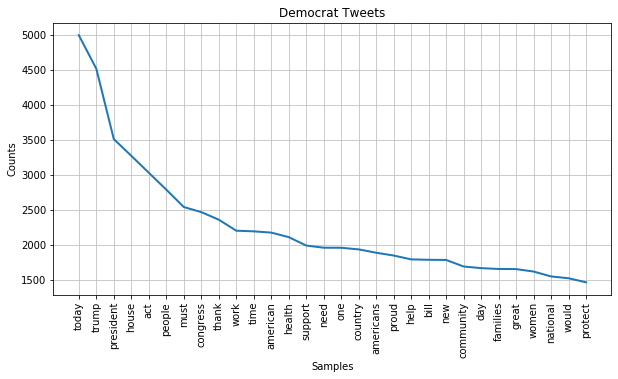

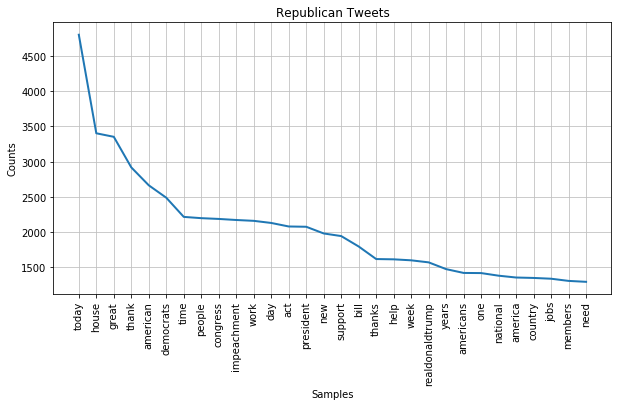

In [78]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,5))
dem_freqdist.plot(30,title="Democrat Tweets")
plt.subplots(figsize=(10,5))
rep_freqdist.plot(30,title="Republican Tweets")

### WordCloud of the most used words

In [93]:
unique_string_democratic = (" ").join(list(dict(dem_freqdist.most_common(100000)).keys()))
unique_string_republican = (" ").join(list(dict(rep_freqdist.most_common(100000)).keys()))
# Wordclouds are created. Collocations is set to false to avoid multiple instances of the same word.
# Colours are set to represent the parties.
dem_wordcloud = WordCloud(max_font_size=100, max_words=100, collocations=False,
                          background_color='white', colormap=plt.cm.Blues, width=800, height=800).generate(unique_string_democratic)
rep_wordcloud = WordCloud(max_font_size=100, max_words=100, collocations=False,
                          background_color='white', colormap=plt.cm.Reds, width=800, height=800).generate(unique_string_republican)

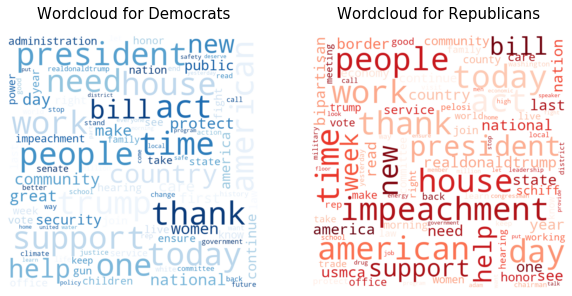

In [94]:
# Plotting of the wordclouds
fig = plt.figure(figsize=(10, 8))

# Democratic wordcloud
plt.subplot(1, 2, 1)
plt.imshow(dem_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Democrats', fontsize=15, y=1.04)

# Republican wordcloud
plt.subplot(1, 2, 2)
plt.imshow(rep_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Republicans', fontsize=15, y=1.04)

plt.savefig("./img/WordCloud100"+".pdf", bbox_inches='tight')
plt.show()

OBSERVATION: we see that both parties' most used words are fairly common words in the field of politics. We therefore calculate the TFIDF for each party.

### WordCloud with TFIDF

In [95]:
# The IDF calculations can take 1 of 2 values: either a word is in both documents in which case idf = log(2/2) = 0, or
# The word is in only one document so that idf = log(2/1) = log(2)

# IDF value is pre-calculated for easy retrieval
c = np.log(2)
# Dataframes are created for both parties containg their respective vocabularies
df_dem = pd.DataFrame(set(dem_tokens), columns=['word'])
df_rep = pd.DataFrame(set(rep_tokens), columns=['word'])
# The dataframes are concatenated using 'outer'. The resulting word-column will be the total
# vocaulary. The second column will be called either 'both' (if word is in both vocabs), 'left_only'
# (word is only in Rep. vocab) or 'right_only' (word is only in Dem. vocab)
df_IDF = pd.merge(df_rep, df_dem, how='outer', indicator=True)
# Column labels
df_IDF.columns = ['word', 'party']
# Column called IDF is created which is a copy of the merger (i.e., 'both', 'left_only', 'right_only')
df_IDF['IDF'] = df_IDF['party']
# It is checked whether the value is 'both'. This returns a boolean (False = 0, True = 1).
# By multiplying these booleans with the calculated IDF, c, all instances where the word is only in
# one party vocab, the value will be c. Where it is 'both', the value will be 0.
df_IDF['IDF'] = (df_IDF['IDF'] != 'both')*c
# Index is changed
df_IDF.set_index('word', inplace=True)
# Frequency distribution of the words
df_freq = pd.DataFrame({'freq': dict(freqdist)})
# Dataframe is created containing the IDF and frequency distribution
df_TFIDF = df_IDF.join(df_freq)
# Values are multiplied resulting in the TFIDF
df_TFIDF['TFIDF'] = df_TFIDF['IDF']*df_TFIDF['freq']

In [96]:
# An empty string is created. A word is added as many times as its TFIDF-value (rounded to nearest integer)
# This is done for both parties
dem_t = ''.join([(index+' ')*int(row['TFIDF']) for index,
                 row in df_TFIDF[df_TFIDF['party'] == 'right_only'].iterrows()])
rep_t = ''.join([(index+' ')*int(row['TFIDF']) for index,
                 row in df_TFIDF[df_TFIDF['party'] == 'left_only'].iterrows()])

In [97]:
# Wordclouds are created. Collocations is set to false to avoid multiple instances of the same word.
# Colours are set to represent the parties.
dem_wordcloud = WordCloud(max_font_size=100, max_words=100, collocations=False,
                          background_color='white', colormap=plt.cm.Blues, width=800, height=800).generate(dem_t)
rep_wordcloud = WordCloud(max_font_size=100, max_words=100, collocations=False,
                          background_color='white', colormap=plt.cm.Reds, width=800, height=800).generate(rep_t)

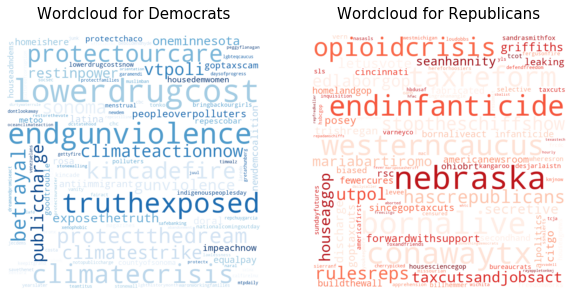

In [98]:
# Plotting of the wordclouds
fig = plt.figure(figsize=(10, 8))

# Democratic wordcloud
plt.subplot(1, 2, 1)
plt.imshow(dem_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Democrats', fontsize=15, y=1.04)

# Republican wordcloud
plt.subplot(1, 2, 2)
plt.imshow(rep_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Republicans', fontsize=15, y=1.04)

plt.show()

OBSERVATION: the wordclouds are very interesting. We see that the Democrats apparently have a larger focus on the climate and health care where the Republicans focus on anti-abortion and tax-cuts. These topics are all more interesting and polarising than the previous results, where we saw that both parties often referred to different political personalities, committees and other political jargon. We see a clear indicator, that the phrases for both parties are political slogans, such as endgunviolence and bornalive. Twitter therefore gives us a valuable insight into the key-issus and focal points of each party.